In [1]:
import os
import gzip
import glob
import re
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
def read_data(dir_path):
    if dir_path is None:
        return None
    files = os.listdir(dir_path)
    records =[]
    for file in files:
        with gzip.open(os.path.join(dir_path, file), 'r') as f:
            for line in f:
                line = line.decode('utf8').strip().split('\t')[-1]
                line = re.sub('[^A-Za-z_]', '', line)
                records.append(re.sub(' +', ' ', line.replace('_', ' ')))
    return records


In [3]:
def find_optimal_clusters(data, max_k, output_path):
    if data is None or output_path is None:
        return None
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    out_path = os.getcwd() + '/' + output_path + '/' + str(max_k) + '/plots'
    if os.path.exists(out_path):
        shutil.rmtree(out_path) 
    os.makedirs(out_path)
    iters = range(2, max_k+1, 2) 
    costs = []
    for k in iters:
        costs.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)     
        print('Fit {} clusters'.format(k))
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    ax.plot(iters, costs, marker='o')
    ax.set_xlabel('No of Cluster Center\'s')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('Costs')
    ax.set_title('Costs by No of Cluster Center\'s') 
    plt.savefig(out_path + '/optimal_clusters.png')
    return None
    

In [4]:
def plot_tsne_pca(data, labels, k, output_path):
    if data is None or labels is None or output_path is None:
        return None
    out_path = os.getcwd() + '/' + output_path + '/' + str(k) + '/plots'
    if not os.path.exists(out_path):
        os.makedirs(out_path)
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=5000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    idx = np.random.choice(range(pca.shape[0]), size=500, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    #plt.savefig(out_path + '/pca.png')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    plt.savefig(out_path + '/tsne_pca.png')
    return None


In [5]:
def get_top_keywords(data, clusters, labels, n_terms, output_path, k):
    if data is None or clusters is None or labels is None or output_path is None:
        return None
    out_path = os.getcwd() + '/' + output_path + '/' + str(k) +  '/data'  + '/top_k_words'
    if os.path.exists(out_path):
        shutil.rmtree(out_path) 
    os.makedirs(out_path)
    out_file = open(os.path.join(out_path, 'out.txt'), "w")    
    df = pd.DataFrame(data.todense()).groupby(clusters).mean() 
    for i,r in df.iterrows():
        out_file.write('Cluster {}'.format(i))
        out_file.write('\n')
        out_file.write(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        out_file.write('\n')
    out_file.close()
    return None

In [6]:
def write_data(data, clusters, output_path, k):
    if data is None or clusters is None or output_path is None:
        return None
    out_path = os.getcwd() + '/' + output_path + '/' + str(k) + '/data' + '/clustered_data'
    if os.path.exists(out_path):
        shutil.rmtree(out_path) 
    os.makedirs(out_path)
    data = pd.DataFrame({'activity':data, 'cluster_label':clusters})
    data.to_csv(out_path+'/data.csv', sep='\t', header=True)
    return None
    

In [7]:
def main(data_path, out_path):
    if data_path is None or out_path is None:
        return None
    data = read_data(data_path)
    vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.95, max_features = 50000, stop_words = 'english')
    vectorizer.fit(data)
    transformed_data = vectorizer.transform(data)
    find_optimal_clusters(transformed_data, 82, out_path)
    clusters = MiniBatchKMeans(n_clusters=82, init_size=1024, batch_size=2048, random_state=20).fit_predict(transformed_data)
    write_data(data, clusters, out_path, 82)
    plot_tsne_pca(transformed_data, clusters, 82, out_path)
    get_top_keywords(transformed_data, clusters, vectorizer.get_feature_names(), 25, out_path, 82)
    return None

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters
Fit 62 clusters
Fit 64 clusters
Fit 66 clusters
Fit 68 clusters
Fit 70 clusters
Fit 72 clusters
Fit 74 clusters
Fit 76 clusters
Fit 78 clusters
Fit 80 clusters
Fit 82 clusters


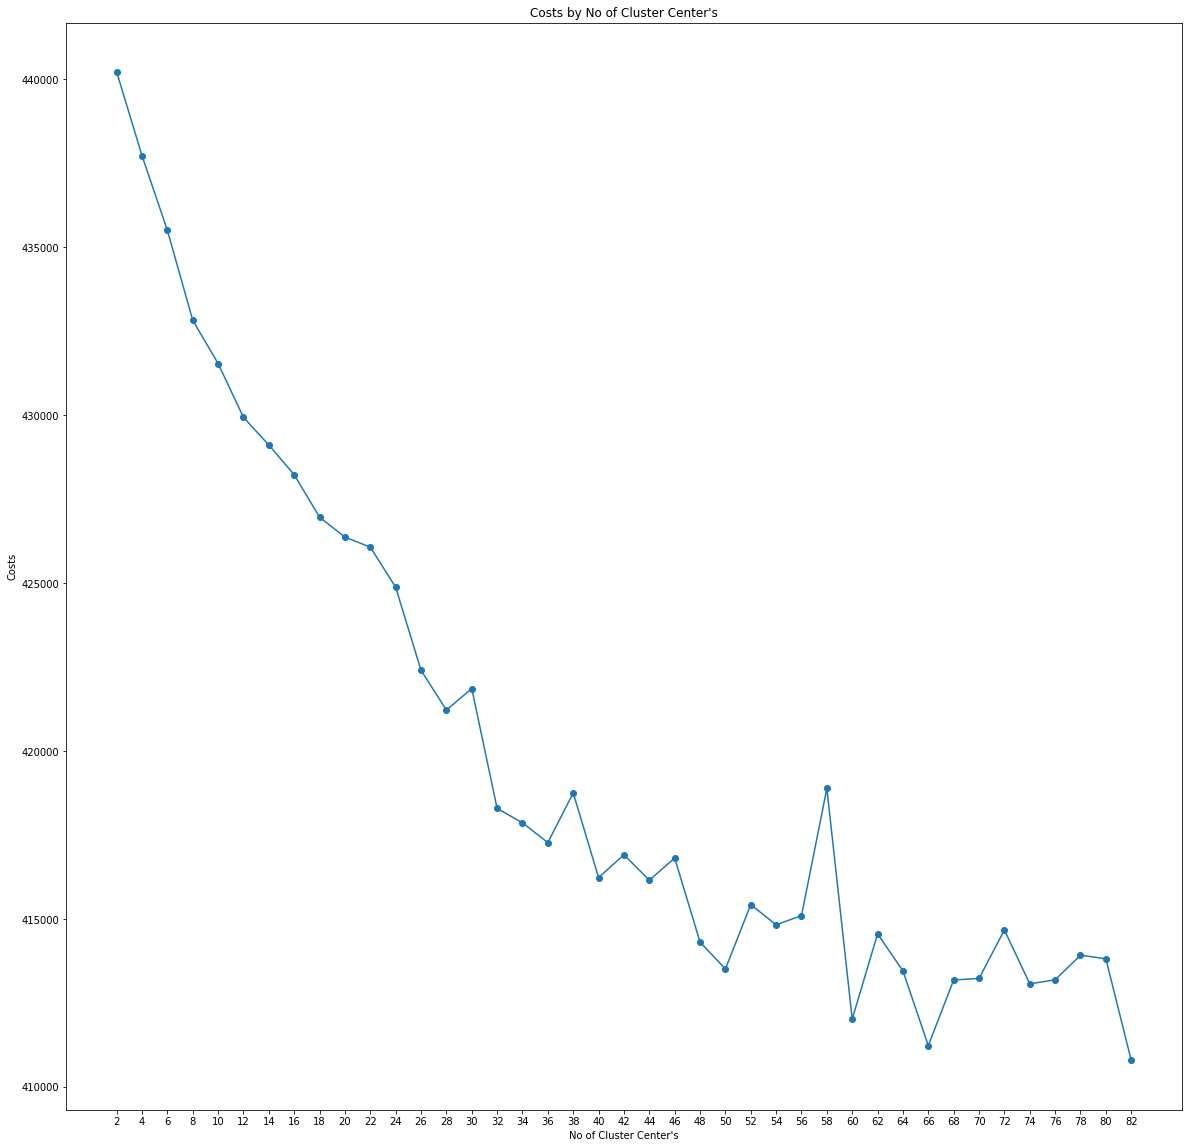

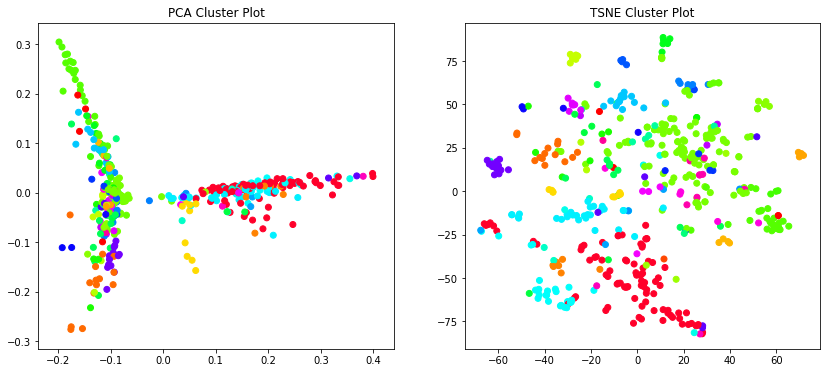

In [8]:
main('data', 'output')
